In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# 미국금리
fedfunds_trin_o = pd.read_csv('FEDFUNDS.csv')
fedfunds_trin_o.head(1)
fedfunds_trin_o = fedfunds_trin_o.drop(['DATE'], axis=1)

fedfunds_trin_o.shape

(239, 1)

In [22]:
# 국고채금리
gbond_trin_o = pd.read_csv('GBOND.csv')
gbond_trin_o.head(1)
gbond_trin_o = gbond_trin_o.drop(['DATE'], axis=1)

gbond_trin_o.shape

(239, 1)

In [23]:
# 제조업 재고율
ir_trin_o = pd.read_csv('ISRATIO.csv')
ir_trin_o.head(1)
ir_trin_o = ir_trin_o.drop(['DATE'], axis=1)

ir_trin_o.shape

(239, 1)

In [24]:
# 미국 M2
m2_trin_o = pd.read_csv('M2.csv')
m2_trin_o.head(1)
m2_trin_o = m2_trin_o.drop(['DATE'], axis=1)

m2_trin_o.shape

(239, 1)

In [25]:
# 한국 M2K
m2k_trin_o = pd.read_csv('M2K.csv')
m2k_trin_o.head(1)
m2k_trin_o = m2k_trin_o.drop(['DATE'], axis=1)

m2k_trin_o.shape

(239, 1)

In [38]:
# 코스피
kospi_trin_o = pd.read_csv('KOSPI.csv')
kospi_trin_o.head(1)

kospi_date_or = np.array(kospi_trin_o)
kospi_date_o = kospi_trin_o.drop(['DATE'], axis=1)

kospi_date_o.shape

(239, 1)

In [32]:
x_train = np.concatenate((fedfunds_trin_o, gbond_trin_o, ir_trin_o, m2_trin_o, m2k_trin_o), axis=1)
y_train = np.array(kospi_date_o)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units = 1)
])

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00015), loss='mse')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 52)                312       
_________________________________________________________________
dropout_1 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_6 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 27        
Total params: 3,446
Trainable params: 3,446
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(
    x_train, y_train, 
    epochs = 10000, 
    batch_size=200,
    verbose=0
)

In [37]:
x_train_o = np.concatenate((fedfunds_trin_o, gbond_trin_o, ir_trin_o, m2_trin_o, m2k_trin_o), axis=1)
# 결과도출
result = model.predict(x_train_o)

In [41]:
result.shape

(239, 1)

In [44]:
#np.delete(result,1,1)
kospi_date = (kospi_date_or.T)[0]

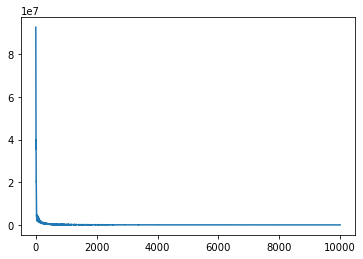

In [45]:
plt.plot(history.history['loss'])
plt.show()

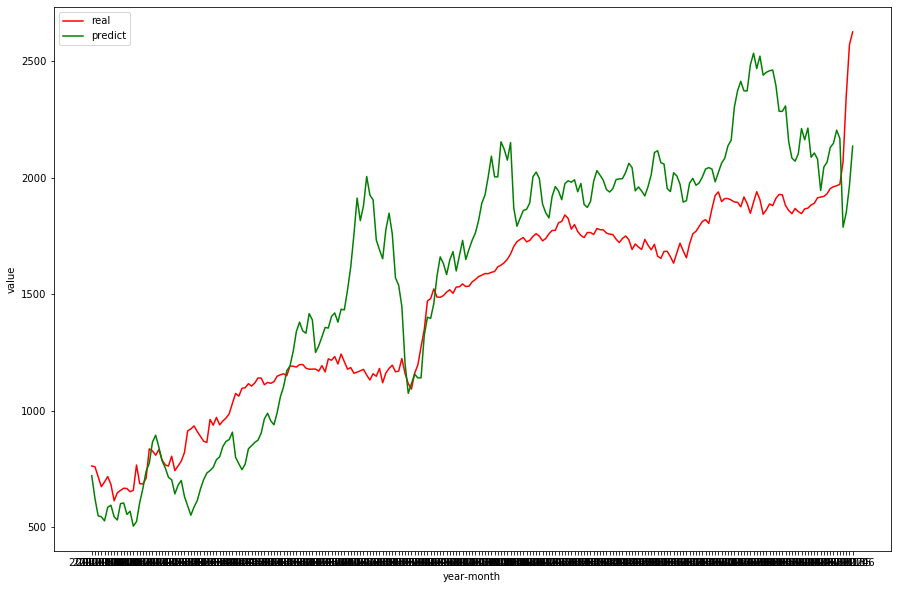

In [47]:
plt.figure(figsize=(15,10))
plt.plot(kospi_date, result, 'r', label='real')
plt.plot(kospi_date, y_train, 'g', label='predict')
plt.xlabel('year-month')
plt.ylabel('value')
plt.legend()
plt.show()

In [48]:
y_train

array([[ 720.35],
       [ 622.92],
       [ 548.07],
       [ 544.09],
       [ 526.36],
       [ 585.02],
       [ 593.4 ],
       [ 543.89],
       [ 530.27],
       [ 600.73],
       [ 602.93],
       [ 554.11],
       [ 567.65],
       [ 504.04],
       [ 523.27],
       [ 604.92],
       [ 665.95],
       [ 738.99],
       [ 774.42],
       [ 864.66],
       [ 894.03],
       [ 842.23],
       [ 784.3 ],
       [ 753.67],
       [ 713.23],
       [ 703.  ],
       [ 642.22],
       [ 679.73],
       [ 699.84],
       [ 630.98],
       [ 591.56],
       [ 550.75],
       [ 585.88],
       [ 613.49],
       [ 663.17],
       [ 703.53],
       [ 731.65],
       [ 742.29],
       [ 756.45],
       [ 789.05],
       [ 801.18],
       [ 845.53],
       [ 867.45],
       [ 875.58],
       [ 907.14],
       [ 798.79],
       [ 771.61],
       [ 746.07],
       [ 770.31],
       [ 835.92],
       [ 849.11],
       [ 863.1 ],
       [ 873.06],
       [ 903.35],
       [ 964.48],
       [ 9